In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("CreditScore.csv")

/tmp/ipython-input-2476328401.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CreditScore.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
df2 = df.copy()

In [5]:
df2.drop(["Credit_Score", "ID", "Customer_ID", "SSN", "Name"], axis = 1, inplace = True)

In [6]:
df2

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083
99998,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [9]:
df2["Month"].value_counts()

,count
Month,
January,12500
February,12500
March,12500
April,12500
May,12500
June,12500
July,12500
August,12500


In [10]:
month_to_num = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8}

In [11]:
df2["Month"] = df2["Month"].str.strip().str.capitalize().map(month_to_num)

In [13]:
df2["Month"].value_counts()

,count
Month,
1,12500
2,12500
3,12500
4,12500
5,12500
6,12500
7,12500
8,12500


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [15]:
df2["Age"].value_counts()

,count
Age,
38,2833
28,2829
31,2806
26,2792
32,2749
...,...
6618,1
3155,1
5063,1


In [16]:
df2["Age"] = pd.to_numeric(df2["Age"], errors = "coerce")

In [17]:
max_age = df2["Age"].max()
min_age = df2["Age"].min()

print(max_age)
print(min_age)

8698.0
-500.0


In [18]:
df2["Age"] = df2["Age"].apply(lambda x: x if 0 <= x <= 100 else np.nan)

In [19]:
max_age = df2["Age"].max()
min_age = df2["Age"].min()

print(max_age)
print(min_age)

100.0
14.0


In [20]:
df2["Occupation"].value_counts()

,count
Occupation,
_______,7062
Lawyer,6575
Architect,6355
Engineer,6350
Scientist,6299
Mechanic,6291
Accountant,6271
Developer,6235
Media_Manager,6232


In [21]:
df2["Occupation"] = df2["Occupation"].replace(r"^_+$", np.nan, regex = True)

In [22]:
df2["Occupation"].value_counts()

,count
Occupation,
Lawyer,6575
Architect,6355
Engineer,6350
Scientist,6299
Mechanic,6291
Accountant,6271
Developer,6235
Media_Manager,6232
Teacher,6215


In [24]:
le = LabelEncoder()

In [25]:
df2["Occupation"] = le.fit_transform(df2["Occupation"])

In [27]:
df2["Annual_Income"].value_counts()

,count
Annual_Income,
36585.12,16
20867.67,16
17273.83,16
95596.35,15
33029.66,15
...,...
3917169.0,1
89394.78_,1
36806.84_,1


In [28]:
df2["Annual_Income"] = pd.to_numeric(df2["Annual_Income"], errors = "coerce")

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       92370 non-null   float64
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             93020 non-null   float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [30]:
df2["Num_of_Loan"].value_counts()

,count
Num_of_Loan,
3,14386
2,14250
4,14016
0,10380
1,10083
...,...
41,1
18,1
56,1


In [31]:
df2["Num_of_Loan"] = pd.to_numeric(df2["Num_of_Loan"], errors = "coerce")

In [32]:
df["Type_of_Loan"].value_counts()

,count
Type_of_Loan,
Not Specified,1408
Credit-Builder Loan,1280
Personal Loan,1272
Debt Consolidation Loan,1264
Student Loan,1240
...,...
"Debt Consolidation Loan, Personal Loan, Mortgage Loan, Personal Loan, Not Specified, Mortgage Loan, and Home Equity Loan",8
"Student Loan, Home Equity Loan, Student Loan, Personal Loan, Not Specified, Auto Loan, Auto Loan, and Debt Consolidation Loan",8
"Not Specified, Auto Loan, Auto Loan, and Debt Consolidation Loan",8


In [37]:
def limpiar_loan(column = df2["Type_of_Loan"]):
  def split_loans(s):

    s = str(s).replace(" and", ",")
    parts = [p.strip() for p in s.split(",")]
    return list(dict.fromkeys(parts))


  df_clean = pd.DataFrame()
  df_clean["Type_of_Loan"] = column
  df_clean["loan_list"] = df_clean["Type_of_Loan"].apply(split_loans)

  explode = df_clean["loan_list"].explode()
  dummies = pd.get_dummies(explode).groupby(level=0).max().astype(int)

  dummies = dummies.loc[:, dummies.columns.str.strip() !=""]

  dummies.drop(["nan"], axis = 1, inplace = True)

  df_clean = pd.concat([df_clean[["Type_of_Loan"]], dummies], axis = 1)

  return df_clean

In [38]:
loan_data = limpiar_loan(df2["Type_of_Loan"])

In [39]:
loan_data

,Type_of_Loan,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,1,0,1,0,0,0,1,0
1,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,1,0,1,0,0,0,1,0
2,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,1,0,1,0,0,0,1,0
3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,1,0,1,0,0,0,1,0
4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,"Auto Loan, and Student Loan",1,0,0,0,0,0,0,0,1
99996,"Auto Loan, and Student Loan",1,0,0,0,0,0,0,0,1
99997,"Auto Loan, and Student Loan",1,0,0,0,0,0,0,0,1
99998,"Auto Loan, and Student Loan",1,0,0,0,0,0,0,0,1


In [40]:
df2 = pd.concat([df2, loan_data], axis = 1)
df2.drop("Type_of_Loan", axis = 1, inplace = True)

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       92370 non-null   float64
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             93020 non-null   float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               95215 non-null   float64
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [42]:
df2["Num_of_Delayed_Payment"].value_counts()

,count
Num_of_Delayed_Payment,
19,5327
17,5261
16,5173
10,5153
18,5083
...,...
3845,1
4075,1
1502,1


In [43]:
df2["Num_of_Delayed_Payment"] = pd.to_numeric(df2["Num_of_Delayed_Payment"], errors = "coerce")

In [45]:
df2["Changed_Credit_Limit"].value_counts()

,count
Changed_Credit_Limit,
_,2091
8.22,133
11.5,127
11.32,126
7.35,121
...,...
30.16,1
4.710000000000001,1
-4.39,1


In [46]:
df2["Changed_Credit_Limit"] = pd.to_numeric(df2["Changed_Credit_Limit"], errors = "coerce")

In [47]:
df2["Credit_Mix"].value_counts()

,count
Credit_Mix,
Standard,36479
Good,24337
_,20195
Bad,18989


In [48]:
df2["Credit_Mix"] = le.fit_transform(df2["Credit_Mix"])

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       92370 non-null   float64
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             93020 non-null   float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               95215 non-null   float64
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    90254 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  in

In [50]:
df2["Outstanding_Debt"].value_counts()

,count
Outstanding_Debt,
1360.45,24
1151.7,23
460.46,23
1109.03,23
1329.59,16
...,...
1619.56_,1
297.64_,1
1264.42_,1


In [51]:
df2["Outstanding_Debt"] = pd.to_numeric(df2["Outstanding_Debt"], errors = "coerce")

In [52]:
df2["Credit_History_Age"].value_counts()

,count
Credit_History_Age,
15 Years and 11 Months,446
19 Years and 4 Months,445
19 Years and 5 Months,444
17 Years and 11 Months,443
19 Years and 3 Months,441
...,...
0 Years and 3 Months,20
0 Years and 2 Months,15
33 Years and 7 Months,14


In [53]:
def limpiar_credit_history(df, column_original = "Credit_History_Age",
                           nueva_col_anio = "credit_history_years",
                           nueva_col_mes = "credit_history_months"):

  df[column_original] = df[column_original].str.strip().str.lower()


  extraido = df[column_original].str.extract(r"(?P<year>\d+)\s*year.*(?P<month>\d+)\s*month")
  df[nueva_col_anio] = pd.to_numeric(extraido["year"], errors= "coerce").fillna(0).astype(int)

  df[nueva_col_mes] = pd.to_numeric(extraido["month"], errors= "coerce").fillna(0).astype(int)

  df.drop(column_original, axis = 1, inplace = True)

  return df


In [54]:
df2 = limpiar_credit_history(df2)

In [55]:
df2

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,credit_history_years,credit_history_months
0,1,23.0,12,19114.12,1824.843333,3,4,3,4.0,3,...,1,0,1,0,0,0,1,0,22,1
1,2,23.0,12,19114.12,NaN,3,4,3,4.0,-1,...,1,0,1,0,0,0,1,0,0,0
2,3,NaN,12,19114.12,NaN,3,4,3,4.0,3,...,1,0,1,0,0,0,1,0,22,3
3,4,23.0,12,19114.12,NaN,3,4,3,4.0,5,...,1,0,1,0,0,0,1,0,22,4
4,5,23.0,12,19114.12,1824.843333,3,4,3,4.0,6,...,1,0,1,0,0,0,1,0,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,9,39628.99,3359.415833,4,6,7,2.0,23,...,0,0,0,0,0,0,0,1,31,6
99996,5,25.0,9,39628.99,3359.415833,4,6,7,2.0,18,...,0,0,0,0,0,0,0,1,31,7
99997,6,25.0,9,39628.99,3359.415833,4,6,5729,2.0,27,...,0,0,0,0,0,0,0,1,31,8
99998,7,25.0,9,39628.99,3359.415833,4,6,7,2.0,20,...,0,0,0,0,0,0,0,1,31,9


In [56]:
def calcular_anio(df, col_anio, col_mes, nueva_columna):
  df[nueva_columna] = df[col_anio] + (df[col_mes] / 12)
  df.drop([col_anio, col_mes], axis = 1, inplace = True)
  return df

In [57]:
df2 = calcular_anio(df2, "credit_history_years", "credit_history_months", "credit_history_years_total")

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Month                       100000 non-null  int64  
 1   Age                         92370 non-null   float64
 2   Occupation                  100000 non-null  int64  
 3   Annual_Income               93020 non-null   float64
 4   Monthly_Inhand_Salary       84998 non-null   float64
 5   Num_Bank_Accounts           100000 non-null  int64  
 6   Num_Credit_Card             100000 non-null  int64  
 7   Interest_Rate               100000 non-null  int64  
 8   Num_of_Loan                 95215 non-null   float64
 9   Delay_from_due_date         100000 non-null  int64  
 10  Num_of_Delayed_Payment      90254 non-null   float64
 11  Changed_Credit_Limit        97909 non-null   float64
 12  Num_Credit_Inquiries        98035 non-null   float64
 13  Credit_Mix     

In [59]:
df2["Payment_of_Min_Amount"].value_counts()

,count
Payment_of_Min_Amount,
Yes,52326
No,35667
NM,12007


In [61]:
df2["Payment_of_Min_Amount"] = le.fit_transform(df2["Payment_of_Min_Amount"])

In [63]:
df2["Amount_invested_monthly"].value_counts()

,count
Amount_invested_monthly,
__10000__,4305
0.0,169
59.93725850034815,1
165.180659491917,1
62.030802602004044,1
...,...
109.296681189146,1
33.6098814431885,1
76.87001005130772,1


In [64]:
df2["Amount_invested_monthly"] = pd.to_numeric(df2["Amount_invested_monthly"], errors = "coerce")

In [66]:
df2["Payment_Behaviour"].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,25513
High_spent_Medium_value_payments,17540
Low_spent_Medium_value_payments,13861
High_spent_Large_value_payments,13721
High_spent_Small_value_payments,11340
Low_spent_Large_value_payments,10425
!@9#%8,7600


In [67]:
df2[["Spend_Level", "Value_Type"]] = df2["Payment_Behaviour"].str.extract(r"^(Low|High)_spent_(Small|Medium|Large)_value_payments")

In [68]:
df2

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,credit_history_years_total,Spend_Level,Value_Type
0,1,23.0,12,19114.12,1824.843333,3,4,3,4.0,3,...,0,1,0,0,0,1,0,22.083333,High,Small
1,2,23.0,12,19114.12,NaN,3,4,3,4.0,-1,...,0,1,0,0,0,1,0,0.000000,Low,Large
2,3,NaN,12,19114.12,NaN,3,4,3,4.0,3,...,0,1,0,0,0,1,0,22.250000,Low,Medium
3,4,23.0,12,19114.12,NaN,3,4,3,4.0,5,...,0,1,0,0,0,1,0,22.333333,Low,Small
4,5,23.0,12,19114.12,1824.843333,3,4,3,4.0,6,...,0,1,0,0,0,1,0,22.416667,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,9,39628.99,3359.415833,4,6,7,2.0,23,...,0,0,0,0,0,0,1,31.500000,High,Large
99996,5,25.0,9,39628.99,3359.415833,4,6,7,2.0,18,...,0,0,0,0,0,0,1,31.583333,High,Medium
99997,6,25.0,9,39628.99,3359.415833,4,6,5729,2.0,27,...,0,0,0,0,0,0,1,31.666667,High,Large
99998,7,25.0,9,39628.99,3359.415833,4,6,7,2.0,20,...,0,0,0,0,0,0,1,31.750000,Low,Large


In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Month                       100000 non-null  int64  
 1   Age                         92370 non-null   float64
 2   Occupation                  100000 non-null  int64  
 3   Annual_Income               93020 non-null   float64
 4   Monthly_Inhand_Salary       84998 non-null   float64
 5   Num_Bank_Accounts           100000 non-null  int64  
 6   Num_Credit_Card             100000 non-null  int64  
 7   Interest_Rate               100000 non-null  int64  
 8   Num_of_Loan                 95215 non-null   float64
 9   Delay_from_due_date         100000 non-null  int64  
 10  Num_of_Delayed_Payment      90254 non-null   float64
 11  Changed_Credit_Limit        97909 non-null   float64
 12  Num_Credit_Inquiries        98035 non-null   float64
 13  Credit_Mix     

In [76]:
df2.drop(["Payment_Behaviour"], axis = 1, inplace = True)

In [70]:
df2["Monthly_Balance"].value_counts()

,count
Monthly_Balance,
__-333333333333333333333333333__,9
252.08489793906085,1
254.9709216273975,1
250.0931678204641,1
289.7550752754317,1
...,...
278.8720257394474,1
376.7024623690405,1
321.2336043357731,1


In [71]:
df2["Monthly_Balance"] = pd.to_numeric(df2["Monthly_Balance"], errors = "coerce")

In [72]:
df2["Spend_Level"].value_counts()

,count
Spend_Level,
Low,49799
High,42601


In [73]:
df2["Spend_Level"] = le.fit_transform(df2["Spend_Level"])

In [74]:
df2["Value_Type"] = le.fit_transform(df2["Value_Type"])

In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Month                       100000 non-null  int64  
 1   Age                         92370 non-null   float64
 2   Occupation                  100000 non-null  int64  
 3   Annual_Income               93020 non-null   float64
 4   Monthly_Inhand_Salary       84998 non-null   float64
 5   Num_Bank_Accounts           100000 non-null  int64  
 6   Num_Credit_Card             100000 non-null  int64  
 7   Interest_Rate               100000 non-null  int64  
 8   Num_of_Loan                 95215 non-null   float64
 9   Delay_from_due_date         100000 non-null  int64  
 10  Num_of_Delayed_Payment      90254 non-null   float64
 11  Changed_Credit_Limit        97909 non-null   float64
 12  Num_Credit_Inquiries        98035 non-null   float64
 13  Credit_Mix     

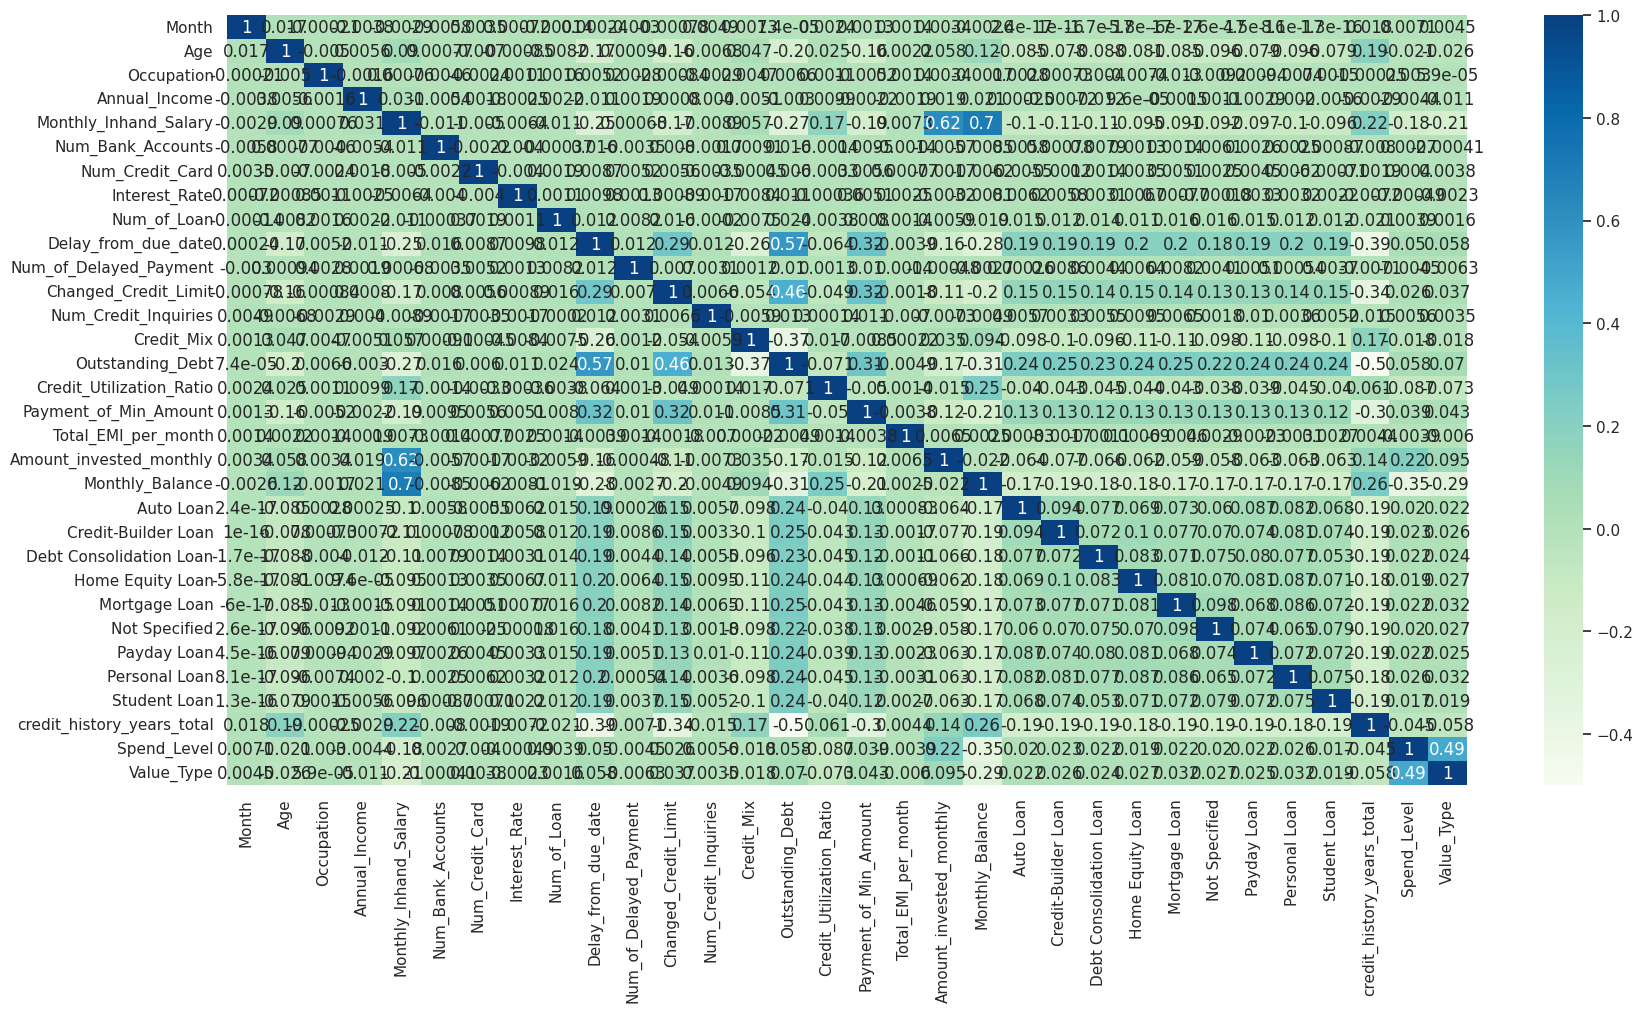

In [80]:
sns.set_theme(style = "whitegrid")
plt.figure(figsize = (20, 10))
sns.heatmap(df2.corr(), annot = True, cmap = "GnBu")
plt.show()

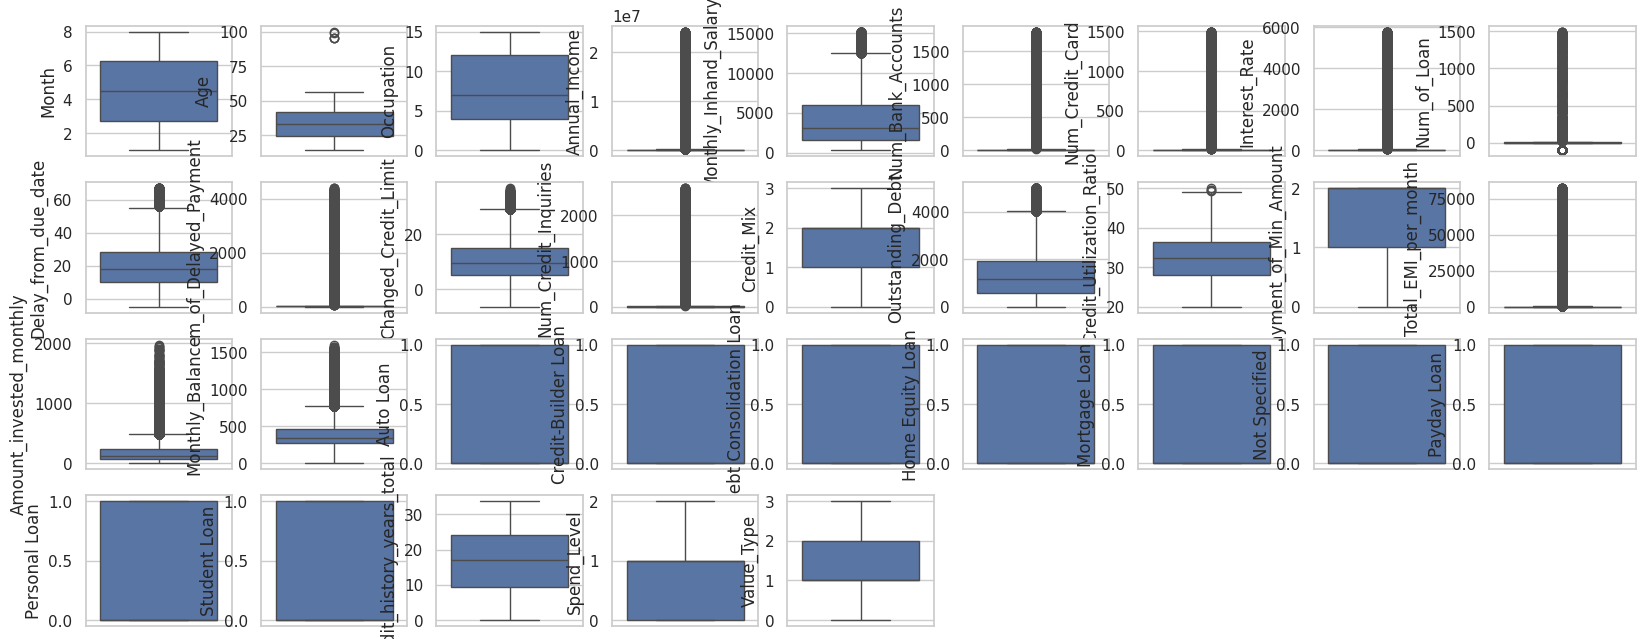

In [82]:
plt.figure(figsize = (20,20))
c= df2.columns
for i in range (len(c)):
  plt.subplot(10,9, i+1)
  sns.boxplot(df2[c[i]])

In [83]:
for i in df2.columns:
  q1 = df2[i].quantile(0.05)
  q4 = df2[i].quantile(0.95)

  df2[i][df2[i] <= q1] = q1
  df2[i][df2[i] >= q4] = q4

/tmp/ipython-input-4183794228.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2[i][df2[i] <= q1] = q1
/tmp/ipython-input-4183794228.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

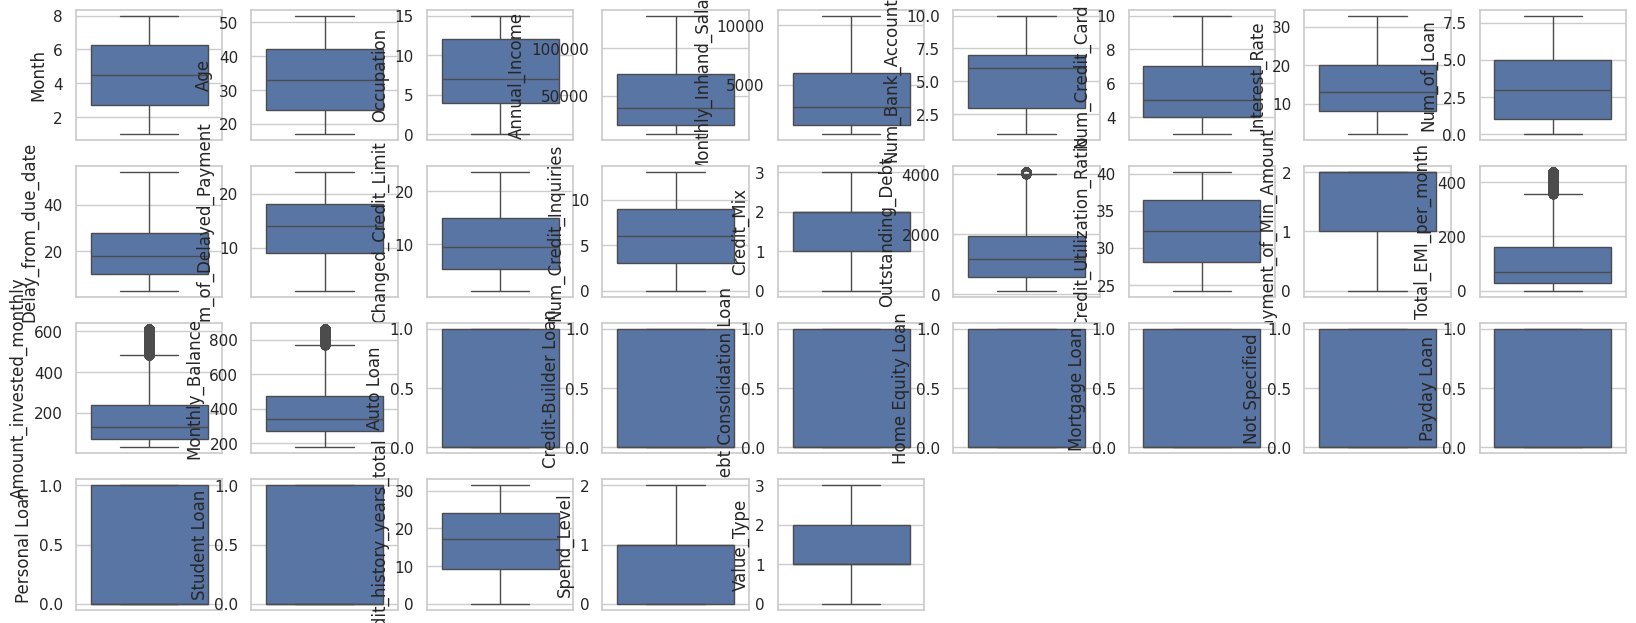

In [84]:
plt.figure(figsize = (20,20))
c= df2.columns
for i in range (len(c)):
  plt.subplot(10,9, i+1)
  sns.boxplot(df2[c[i]])

In [85]:
df2.isnull().sum()

,0
Month,0
Age,7630
Occupation,0
Annual_Income,6980
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,4785
Delay_from_due_date,0


In [86]:
numerical_cols_with_missing = df2.select_dtypes(include = np.number).columns[df2.select_dtypes(include=np.number).isnull().any()]

print(numerical_cols_with_missing)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')


In [87]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "mean")
df2[numerical_cols_with_missing] = imputer.fit_transform(df2[numerical_cols_with_missing])



In [88]:
df2.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
